<a href="https://colab.research.google.com/github/RutujaSFulzele/MachineLearning_Project-/blob/main/Online_payment_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from matplotlib.colors import ListedColormap
%pylab inline
%matplotlib inline

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib



 Reading and exploring the dataset

In [3]:
path_payment = '/content/drive/MyDrive/Python data set/OnlinePaymentFraud.csv'

In [4]:
df_payment = pd.read_csv(path_payment)

In [5]:
df_payment.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
df_payment.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df_payment.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [7]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [8]:
df2= df_payment.copy()

Handling Missing Values

In [9]:
if df2.isnull().values.any():
    print('Unfortunately, there are missing values in the dataset\n')
    df2.dropna(inplace=True)
    print('Shape : ', df2.shape)
else:
    print('Fortunately, there aren\'t missing values in the dataset.')

Fortunately, there aren't missing values in the dataset.


Data Visualization

In [10]:
obj = (df2.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df2.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df2.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


Handelling Outliers

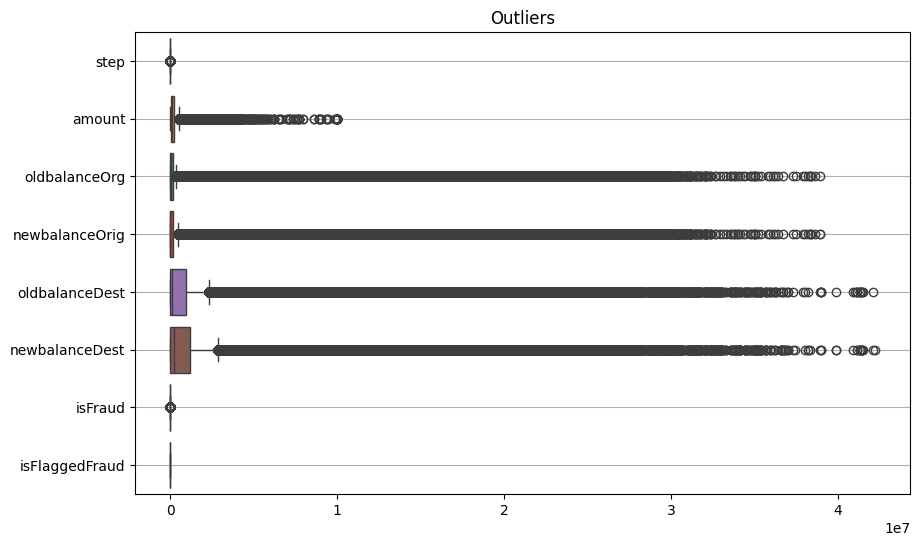

In [11]:
# outliers = Unusual values

plt.figure(figsize=(10, 6))
sns.boxplot(df2, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

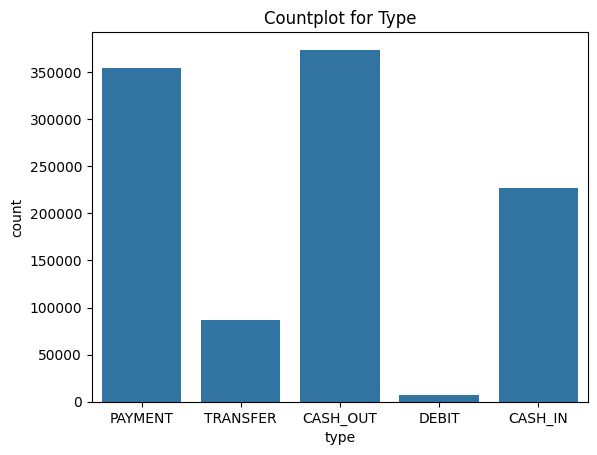

In [12]:
#the count plot of the Payment type column using Seaborn library
#count plot
sns.countplot(df2, x='type')
plt.title("Countplot for Type")
plt.show()

<Axes: xlabel='type', ylabel='amount'>

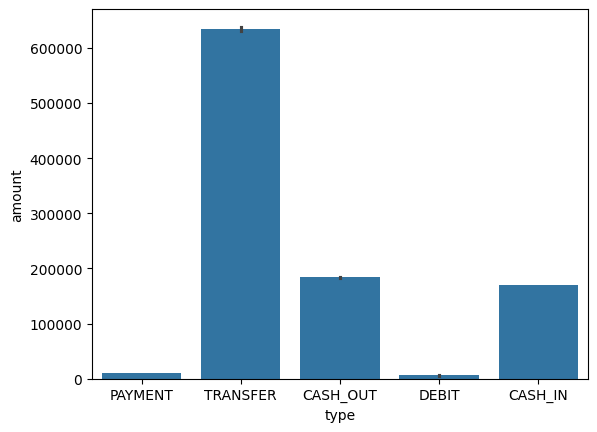

In [13]:
# bar plot for analyzing Type and amount column simultaneously.
sns.barplot(df2,x='type', y='amount')

In [14]:
df2['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [15]:
# count each component value
df2['type'].value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

In [16]:
# information about the columns
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


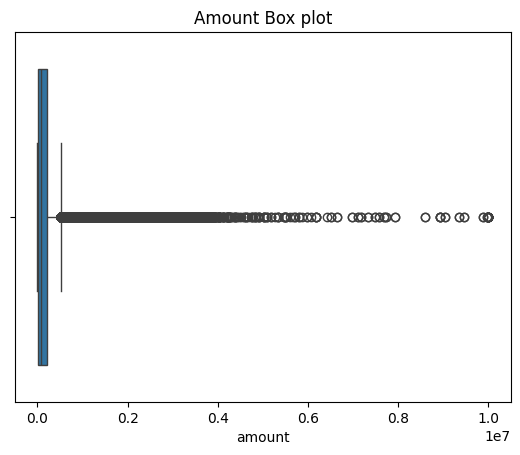

In [17]:
sns.boxplot(df2,x='amount')
plt.title("Amount Box plot")
plt.show()

In [18]:
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# check labels in "type" feature
df2['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [19]:
df2['type'].value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

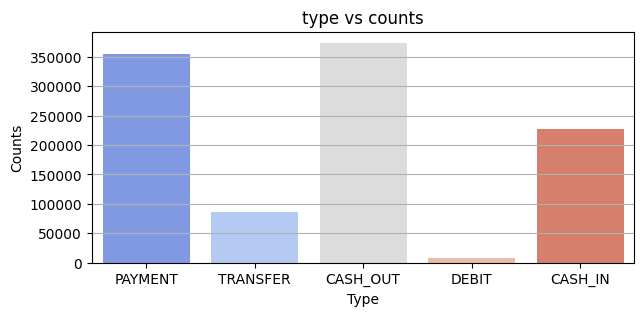

In [20]:
plt.figure(figsize=(7,3))
plt.title('type vs counts')
sns.countplot(df2,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

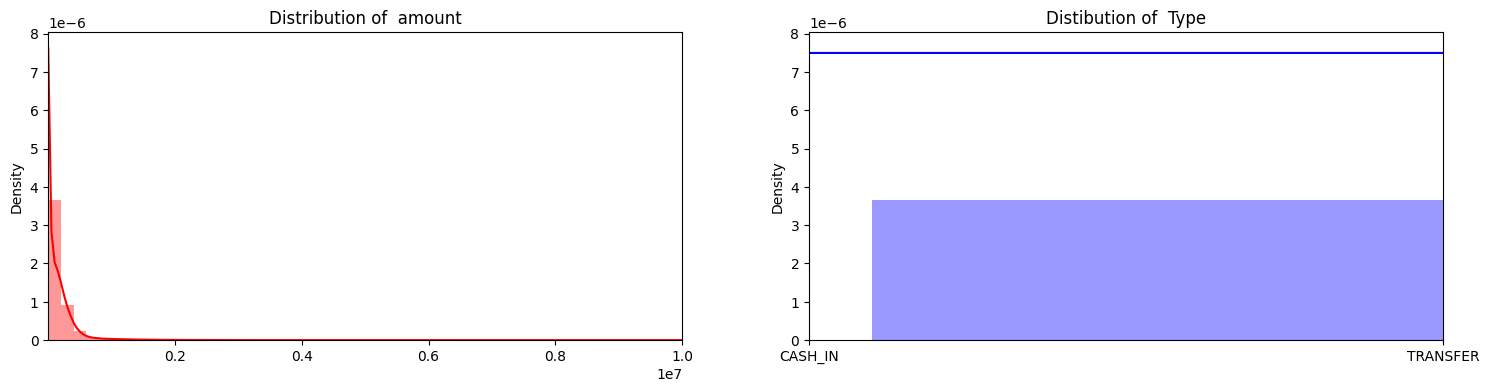

In [21]:
# distribution of Type and Amount
fig, ax = plt.subplots(1,2,figsize=(18,4))
amount_val = df2['amount'].values
type_val = df2['type'].values

sns.distplot(amount_val,ax=ax[0],color='r')
ax[0].set_title('Distribution of  amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(amount_val,ax=ax[1],color='b')
ax[1].set_title('Distibution of  Type')
ax[1].set_xlim([min(type_val), max(type_val)])

plt.show()

Label Encoding

In [22]:
df2['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [23]:
df2['type'].value_counts()

type
0    373641
1    353873
2    227130
3     86753
4      7178
Name: count, dtype: int64

In [24]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Analysis  of categories of the "isFraud" feature

In [25]:
# check labels in "isFraud" feature
df2['isFraud'].unique()

array([0, 1])

In [26]:
df2['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

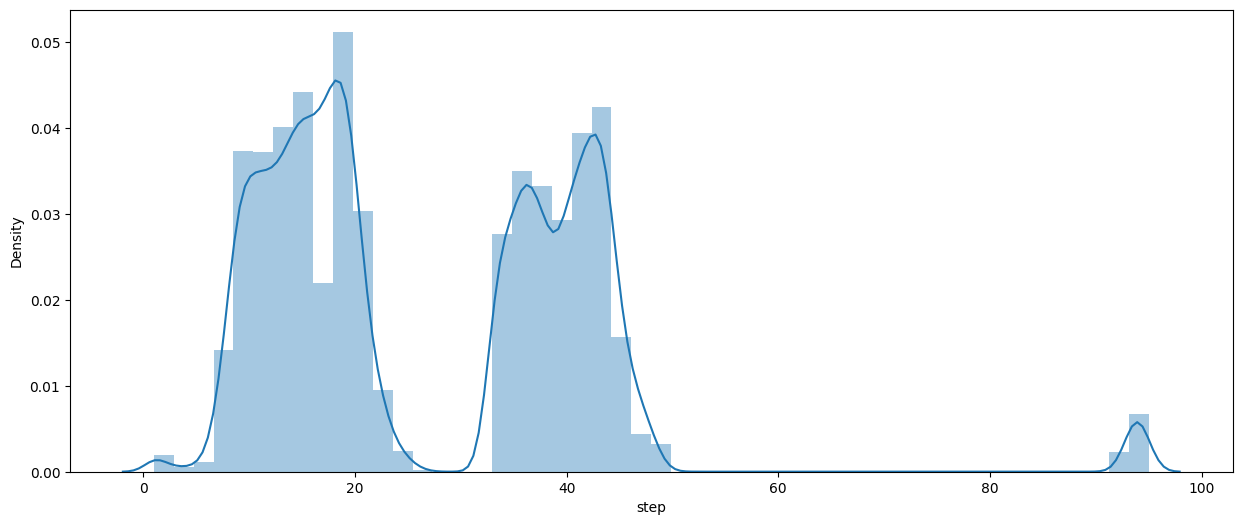

In [27]:
#distribution of the step column using distplot.

plt.figure(figsize=(15, 6))
sns.distplot(df2['step'], bins=50)


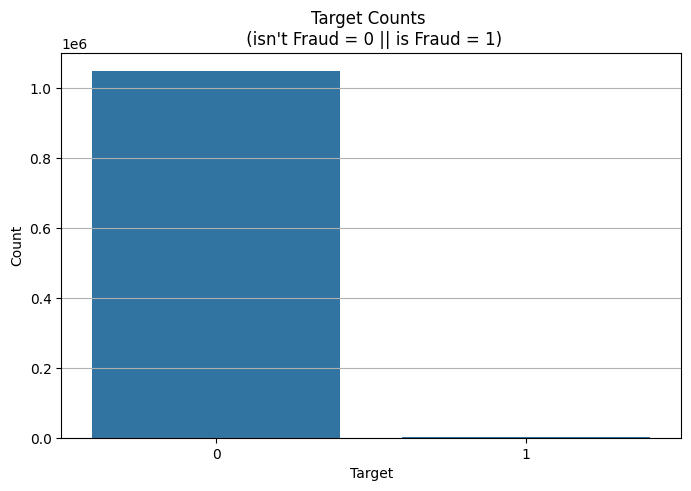

In [28]:
Target_counts = df2['isFraud'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.xticks()
plt.grid(axis='y')
plt.show()

Dropping unnecessary features

In [29]:
df2.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [30]:
df2.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

Feature Extraction

In [31]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

df2.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.005397,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
type,0.005397,1.000000,0.265263,0.262623,0.272537,0.057842,0.059061,0.014645,NaN
amount,-0.025996,0.265263,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,0.262623,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,0.272537,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,0.057842,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,0.059061,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.014645,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


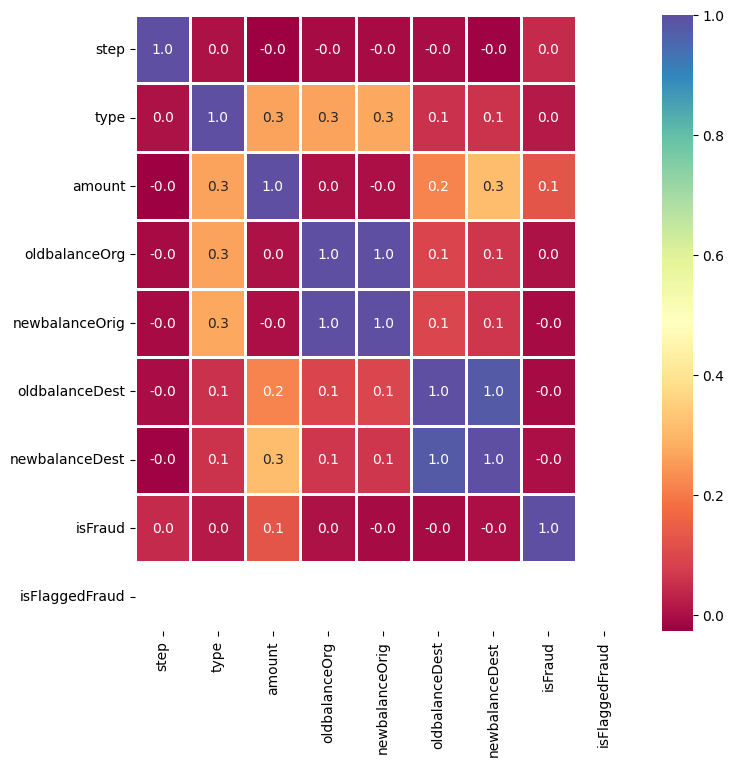

In [32]:
#find the correlation among different features using Heatmap.
plt.figure(figsize=(8, 8))
sns.heatmap(df2.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='Spectral')
plt.show()

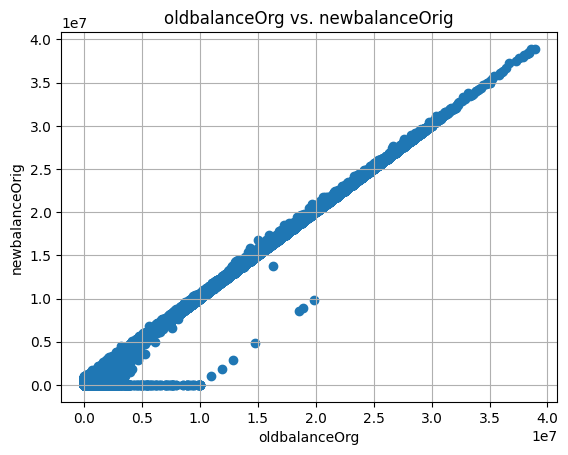

In [33]:
#Correlation between oldbalanceOrg and newbalanceOrig
plt.scatter(df2['oldbalanceOrg'], df2['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)

In [34]:
#Dropping unnecessary features based on correlation
df2.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)

In [35]:
df2.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   oldbalanceOrg   1048575 non-null  float64
 3   newbalanceOrig  1048575 non-null  float64
 4   oldbalanceDest  1048575 non-null  float64
 5   newbalanceDest  1048575 non-null  float64
 6   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 56.0 MB


In [37]:
df2.head() # Default : first 5 rows

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,3,181.00,181.0,0.00,0.0,0.0,1
3,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [38]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
type,1048575.0,1.046281e+00,9.815017e-01,0.0,0.000,1.00,2.000,4.0
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0
isFraud,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.0


In [39]:
#1 use SMOTE Strategy
# related to  'isFraud'
# SMOTE library
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df2.drop('isFraud', axis=1)
y = df2['isFraud']
x_smote,y_smote = smote.fit_resample(X,y)
print(x_smote.shape)
print(y_smote.shape)


(2094866, 6)
(2094866,)


<Axes: xlabel='isFraud'>

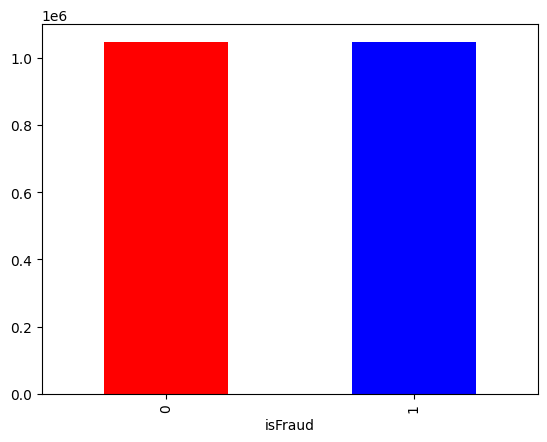

In [40]:
# explore the value of y_smote
y_smote.value_counts().plot(kind='bar', color=['red','blue'])


Train Test Split

In [41]:
#Training and Testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [42]:
# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (734002, 6)
X_test shape is  (314573, 6)
y_train shape is  (734002,)
y_test shape is  (314573,)


Data Scaling / Feature Scaling

In [43]:
 #Standardization (Z-Score Normalization)
# StandardScaler for Data

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
#Let’s train the model


    # Train the model
model_lg = LogisticRegression()
hist1 = model_lg.fit(X_train_scaled,y_train)


In [45]:
# Evaluate the model
predictions = model_lg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score is %d", accuracy)

Accuracy score is %d 0.9991226201867293


In [46]:
# Generate the classification report
report = classification_report(y_test,predictions)
print("the classification report is %d",report)


the classification report is %d               precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.88      0.24      0.38       349

    accuracy                           1.00    314573
   macro avg       0.94      0.62      0.69    314573
weighted avg       1.00      1.00      1.00    314573



In [47]:
# Random Forest for binary classification ofOnline paymentfraud detection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

model_rf = RandomForestClassifier(n_estimators=10)
# fit the random forest
model_rf.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Evaluation of the model on the basis of Random Forest
prediction_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test,prediction_rf)
print("Test Accuracy",accuracy_rf)


Test Accuracy 0.9995994570417678


In [48]:
# Decision tree classifier
dct = DecisionTreeClassifier()
dct.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [49]:
# Decision tree classifier
dct = DecisionTreeClassifier()
dct.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [50]:
# Use the model to make predictions on your test data
pred_y_dct = dct.predict(X_test_scaled)


In [51]:
# #cross validation
from sklearn.model_selection import KFold
# Support Vector Machines
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# import warning package
import warnings
warnings.filterwarnings('ignore')
# metrics for classification
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [52]:
#classification report
clf_report = classification_report(y_test,pred_y_dct)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.76      0.77      0.76       349

    accuracy                           1.00    314573
   macro avg       0.88      0.88      0.88    314573
weighted avg       1.00      1.00      1.00    314573



In [53]:
svc_kernel = SVC(kernel='rbf')

In [ ]:
# fitting the support vector classifier
model_svc = svc_kernel.fit(X_train_scaled,y_train)

In [ ]:
svc_kernel_rbf = SVC(kernel='linear')
# fitting the support vector classifier
model_svc_rbf = svc_kernel.fit(X_train_scaled,y_train)

In [ ]:
# Roc curve implementation
pred_prob_log = model_lg.predict_proba(X_test_scaled)
pred_prob_rnd = model_rf.predict_proba(X_test_scaled)
pred_prob_dtc = dct.predict_proba(X_test_scaled)


In [ ]:
# ROC Curve and AUC score
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
# draw the ROC curve for different models
# logisitc regression estimators
fpr1, tpr1,thresh1 = roc_curve(y_test,predictions)
# random forest classifier estimator
fpr2, tpr2,thresh2 = roc_curve(y_test,prediction_rf)
# decision tree estimator
fpr3, tpr3,thresh3 = roc_curve(y_test,pred_y_dtc)

In [ ]:
# roc curve for TPR = FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)

In [ ]:
# AUC Score
auc_score_log = roc_auc_score(y_test,pred_prob_log[:,1] )
auc_score_rnd = roc_auc_score(y_test,pred_prob_rnd[:,1] )
auc_score_dtc = roc_auc_score(y_test,pred_prob_dtc[:,1] )
print(auc_score_log,auc_score_rnd,auc_score_dtc)

In [ ]:
# matplotlib for plotting the curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
# lot the roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--', color='red', label='Random Forest Classifier')
plt.plot(fpr3, tpr3, linestyle='--', color='green', label='Decision tree classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


In [ ]:
# title
plt.title("ROC Curve")


In [ ]:
# x label
plt.xlabel("False Positive rate")

In [ ]:
#y label
plt.ylabel("True Positive Rate")


In [ ]:
# plt.show()